# Stock Price Prediction 

## Problem Statement

To predict a signal that indicates whether buying a particular stock will be helpful or not by using ML.

## About Data
* Date: This represents the date on which the stock data was recorded
* Open: The opening price refers to the price at which a security (in this case, Tesla stock) was traded at the beginning of a trading day
* High: The high price indicates the highest price at which the stock was traded during a specific period, typically within the trading day
* Low: The low price refers to the lowest price at which the stock was traded during a particular period, usually within the trading day
* Close: The closing price represents the final price at which the stock was traded at the end of the trading day. 
* Adj Close: The adjusted closing price accounts for corporate actions such as stock splits, dividends, and rights offerings to present a more accurate reflection of the stock's value
* Volume: Volume refers to the total number of shares or contracts traded for a specified security during a specific period, typically a trading day

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [59]:
#loading data set
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [25]:
#shape of data
df.shape

(2416, 7)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [38]:
# checking null values in the dataset
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [28]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [60]:
# checking whether each column have same data or not
df['Close'].equals(df['Adj Close'])

True

so, we’ll drop this column

In [61]:

df = df.drop(['Adj Close'], axis=1)

## Exploratory Data Analysis

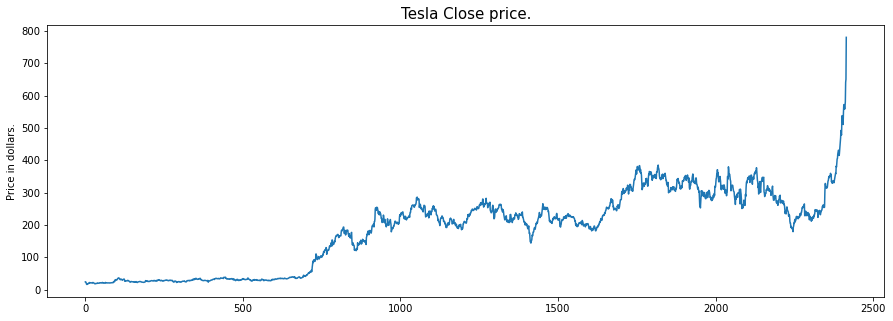

In [62]:

plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

The prices of tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

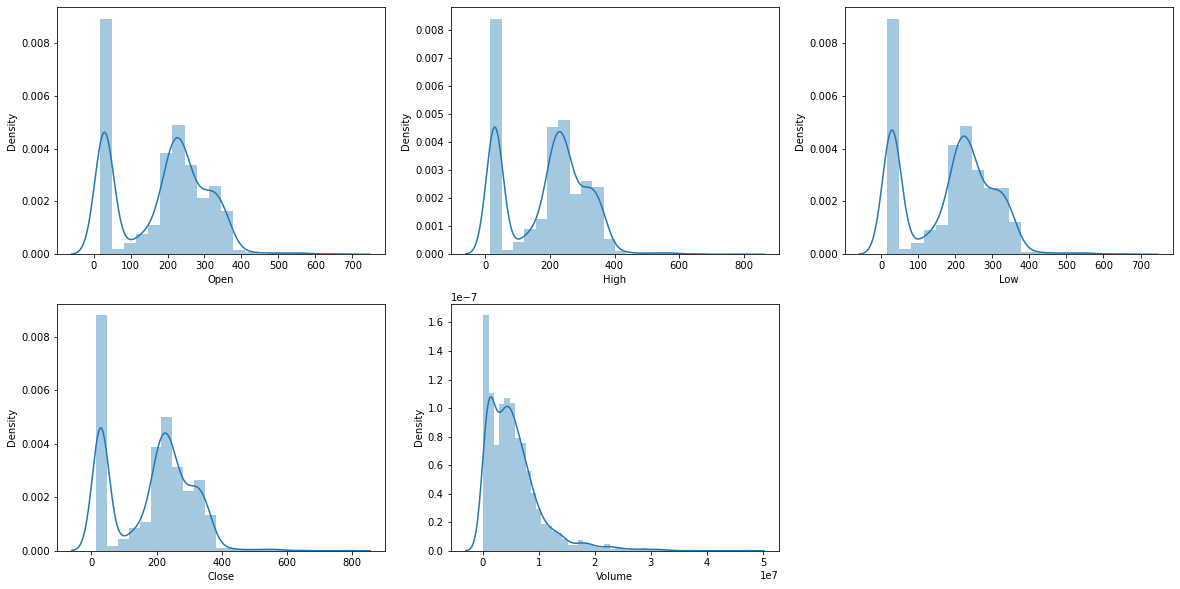

In [42]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

In the distribution plot of the OHLC (Open, High, Low, Close) data, there are two prominent peaks, indicating substantial variations in the data in two distinct regions. 
Additionally, the Volume data is skewed to the left

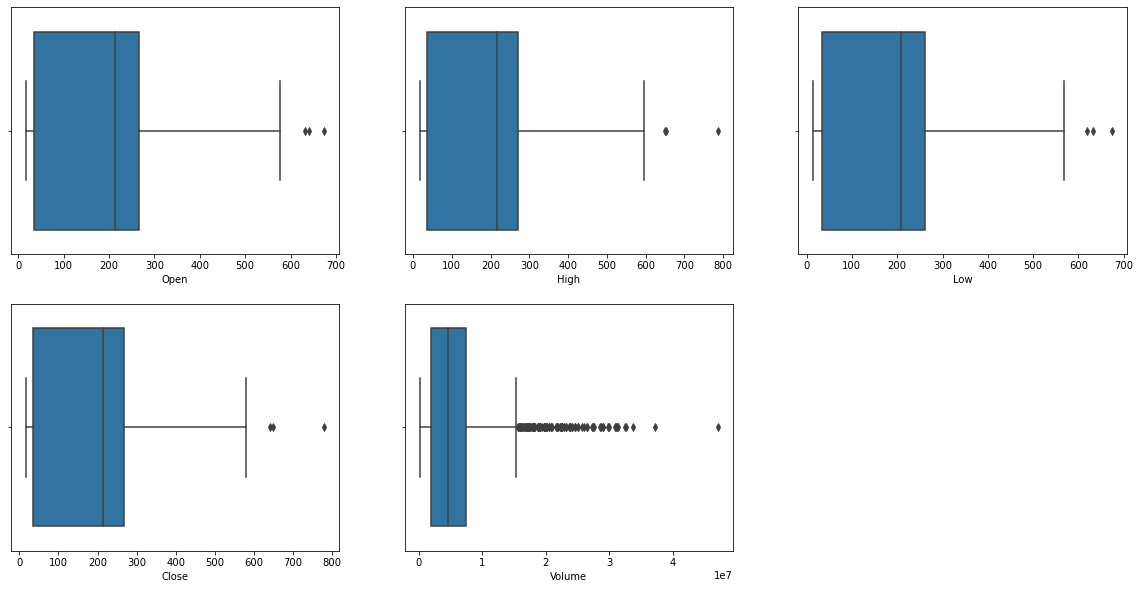

In [63]:
# Outlier detection
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[col])
plt.show()

From the above boxplots, we can conclude that only volume data contains more outliers in it but the data in the rest of the columns are having very few outliers.

To remove them we use IQR methode

In [65]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find the outliers
outlier_indices = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Remove the outliers from the DataFrame
df = df[~outlier_indices]

## Feature Engineering

In [66]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Split the 'Date' column into day, month, and year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [67]:
df

,Date,Open,High,Low,Close,Volume,Day,Month,Year
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,6,7,2010
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,6921700,7,7,2010
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,7711400,8,7,2010
...,...,...,...,...,...,...,...,...,...
2400,2020-01-10,481.790009,484.940002,473.700012,478.149994,12959500,10,1,2020
2405,2020-01-17,507.609985,515.669983,503.160004,510.500000,13629100,17,1,2020
2409,2020-01-24,570.630005,573.859985,554.260010,564.820007,14353600,24,1,2020
2410,2020-01-27,541.989990,564.440002,539.280029,558.020020,13608100,27,1,2020


In [68]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year,is_quarter_end
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,6,7,2010,0
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,6921700,7,7,2010,0
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,7711400,8,7,2010,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

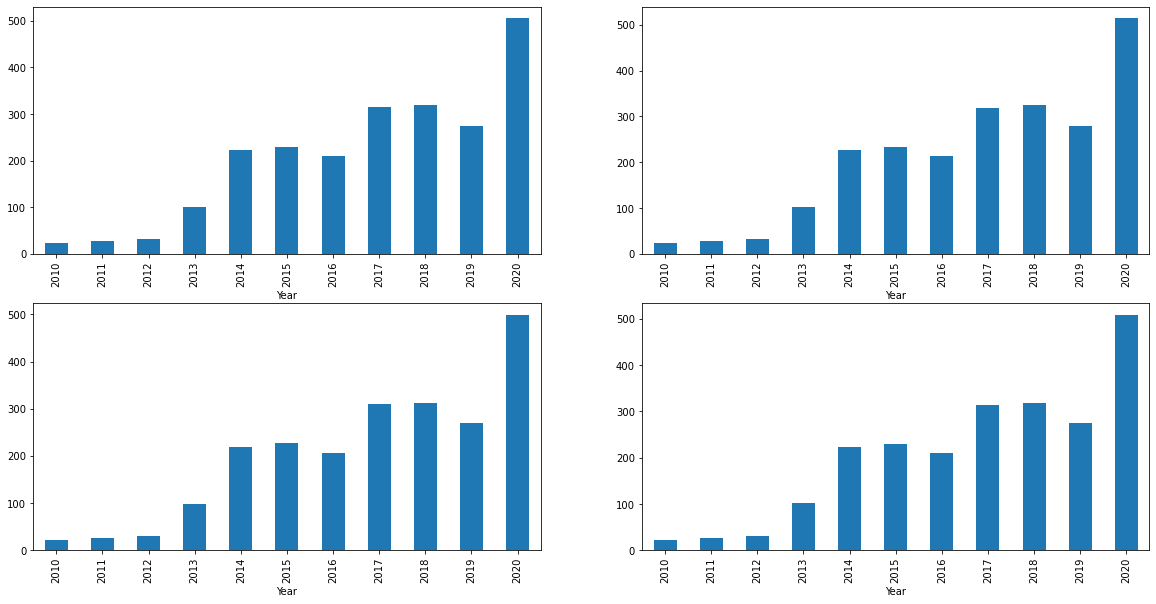

In [69]:
group_data = df.groupby('Year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    group_data[col].plot.bar()
plt.show()

From the above bar graph, we can conclude that the stock prices have gradually increaced  from the year 2014 to that in 2020.

In [70]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,Day,Month,Year
is_quarter_end,,,,,,,,
0,180.667038,183.642811,177.553627,180.758855,4.759124e+06,15.766294,6.198815,2014.708361
1,185.317861,188.370090,182.270863,185.348505,4.741039e+06,15.872423,7.627577,2014.632732


* Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
* mThe volume of trades is a bit lower in the months which are quarter end.

In [73]:
# Adding more features for prediction
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

open_close: This feature might capture the daily price movement pattern where a positive value could indicate a bullish trend, while a negative value might indicate a bearish trend for that day.
low-high : This feature could potentially capture the volatility or range of price movement within a day, where a larger value might indicate higher volatility.


target-it indicating the price movement direction on the next day. If the closing price of the stock on the next day is greater than the current day's closing price, it assigns 1 (indicating an increase), otherwise 0 (indicating no increase or a decrease).

We have added the target feature which is a signal whether to buy or not we will train our model to predict this only

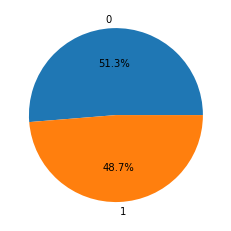

In [75]:
# let’s check whether the target is balanced or not
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

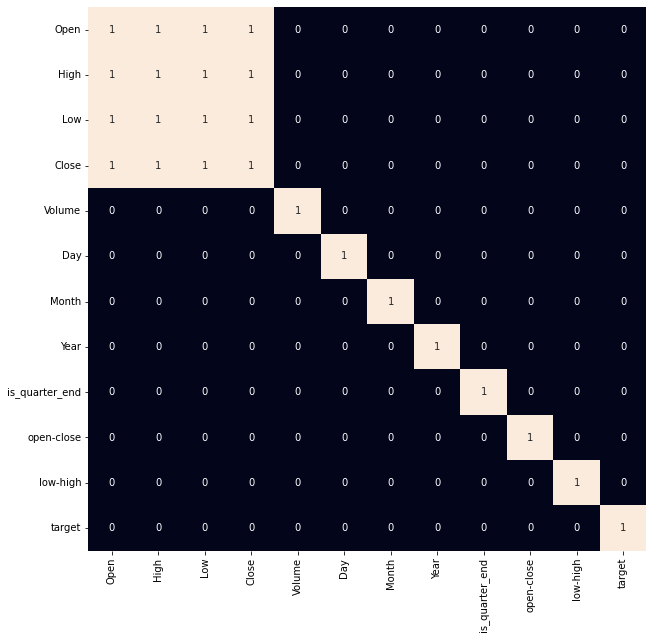

In [77]:
#to ensure that there are no highly correlated features
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

Based on the heatmap, it's evident that there is a strong correlation among the OHLC (Open, High, Low, Close) features which leads to multi colliniarity


In [79]:
X = df[['open-close', 'low-high', 'is_quarter_end']]
y = df['target']

In [80]:
#Normalization
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [91]:
#Splitting the data into testing ang training data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape)

(1836, 3) (459, 3)


## Model Development and Evaluation

We will now proceed to train advanced machine learning models, including Logistic Regression, Support Vector Machine, and XGBClassifier. We will assess their performance based on training and validation data to determine which model best serves our current objective.

We have chosen the ROC-AUC curve as the evaluation metric. This choice is because we aim to predict soft probabilities,

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [97]:


models = [LogisticRegression(), SVC(), XGBClassifier()]

# Define hyperparameters for each model
parameters = [
    {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf'], 'probability': [True]},
    {'n_estimators': [100, 500, 1000], 'learning_rate': [0.01, 0.1, 0.2]}
]

# Perform GridSearchCV for each model
for i in range(len(models)):
    grid_search = GridSearchCV(models[i], parameters[i], cv=5)
    grid_search.fit(X_train, y_train)

    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_valid)

    train_accuracy = roc_auc_score(y_train, y_train_pred)
    test_accuracy = roc_auc_score(y_valid, y_test_pred)

    print(f"Model: {models[i]}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}")
    print(f"Training accuracy: {train_accuracy}")
    print(f"Testing accuracy: {test_accuracy}\n")

Model: LogisticRegression()
Best parameters: {'C': 10, 'penalty': 'l2'}
Best score: 0.5272316668641157
Training accuracy: 0.5224947891614559
Testing accuracy: 0.5110416983138386

Model: SVC()
Best parameters: {'C': 0.1, 'kernel': 'linear', 'probability': True}
Best score: 0.5228734747067884
Training accuracy: 0.5111752445085778
Testing accuracy: 0.4982245936503114

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=No

### Observations:

* The Logistic Regression model shows moderate performance, with the training accuracy slightly higher than the testing accuracy.
* The SVC model's accuracy is lower than the Logistic Regression model, indicating potential underfitting.
* The XGBClassifier model demonstrates the highest training accuracy, but the testing accuracy is relatively lower, suggesting some degree of overfitting.

* The prices of tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.
* The OHLC (Open, High, Low, Close) data, there are two prominent peaks, indicating substantial variations in the data in two distinct regions. Additionally, the Volume data is skewed to the left
* The stock prices have gradually increaced from the year 2014 to that in 2020.
*  There is a strong correlation among the OHLC (Open, High, Low, Close) features which leads to multi colliniarity